In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Desafio Ds 2025 - Gen AI/ofertas_relampago.csv')

In [3]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


# Checks y Ajustes

TODO
Ver que la data este ok (SOLD QUANTITY = INV - REM)
Ver dominios mas vendidos
Ver precio promedio de los vendidos
Ver si menor tiempo vende mas
Ver dia de semana con mayor venta
Ver si shipping vende mejor

In [4]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [5]:
df['SOLD_QUANTITY'] = np.where(df['SOLD_QUANTITY'].isna(), df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END'], df['SOLD_QUANTITY'])
df['ASP'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']

In [6]:
# Consultar si SOLD_QUANTITY contempla cancelados, sino cambiarlo por la resta
df[df['SOLD_QUANTITY'] != df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END']]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP
33,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,11,26.82,5.0,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-BLOUSES,5.364000
37,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,lightning_deal,10,8,13.34,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-MUGS,4.446667
93,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:09+00:00,lightning_deal,10,9,13.58,2.0,NaN,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,6.790000
99,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 19:28:55+00:00,lightning_deal,7,-3,15.57,6.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,2.595000
153,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:03+00:00,lightning_deal,5,3,24.99,3.0,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SANDALS_AND_FLIP_FLOPS,8.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48489,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,90.40,1.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS,90.400000
48490,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,271.20,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS,90.400000
48570,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 01:00:05+00:00,lightning_deal,5,5,5.21,4.0,NaN,none,SPORTS,APP & SPORTS,MLM-KINESIOLOGY_TAPES,1.302500
48628,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,30,27,9.61,4.0,A,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-ANGLE_FINDERS,2.402500


In [7]:
df['ORIGIN'].value_counts()

ORIGIN
A    11316
Name: count, dtype: int64

In [8]:
df['SHIPPING_PAYMENT_TYPE'].value_counts()

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: count, dtype: int64

In [9]:
df['OFFER_TYPE'].value_counts()

OFFER_TYPE
lightning_deal    48746
Name: count, dtype: int64

In [10]:
df['OFFER_SPAN'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
df['OFFER_SPAN_MINUTES'] = round(df['OFFER_SPAN'].dt.seconds / 60)
df['SOLD_PERCENT'] = df['SOLD_QUANTITY'] / (df['INVOLVED_STOCK'] - np.where(df['REMAINING_STOCK_AFTER_END'] < 0, df['REMAINING_STOCK_AFTER_END'], 0))

# Que vertical/domain es consistente o performa mejor

In [11]:
dom_df = df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dom_df.columns = ['_'.join(col) for col in dom_df.columns.to_flat_index()]
vert_df = df.groupby(['VERTICAL'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES']].agg(['sum', 'max', 'mean', 'median', 'count'])
vert_df.columns = ['_'.join(col) for col in vert_df.columns.to_flat_index()]

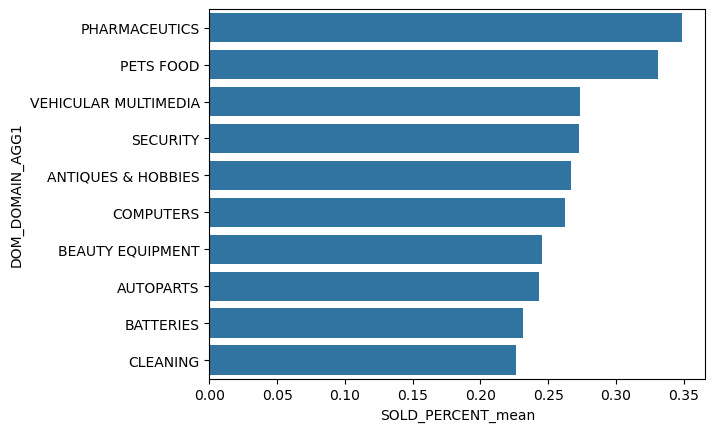

In [12]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_PERCENT_mean', ascending=False).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

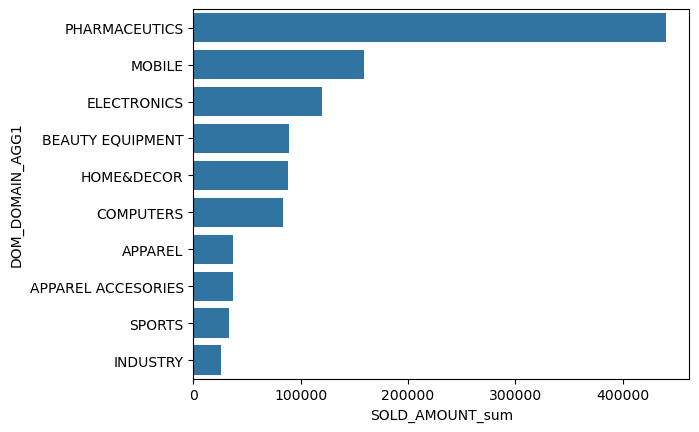

In [13]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

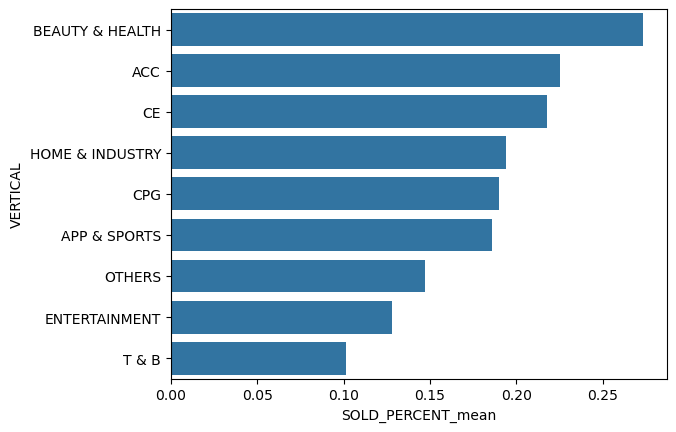

In [14]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_PERCENT_mean', ascending=False).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

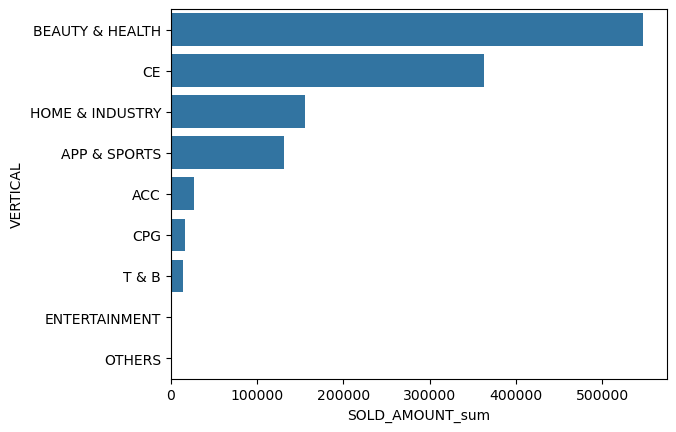

In [15]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

Los productos de belleza son aquellos que mas stock venden sobre el ofertado, a la vez de que son los que mas recaudan

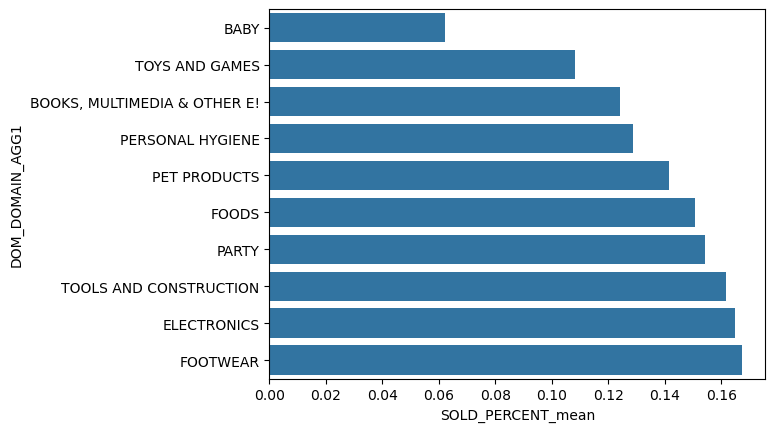

In [16]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 10].sort_values(by='SOLD_PERCENT_mean', ascending=True).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

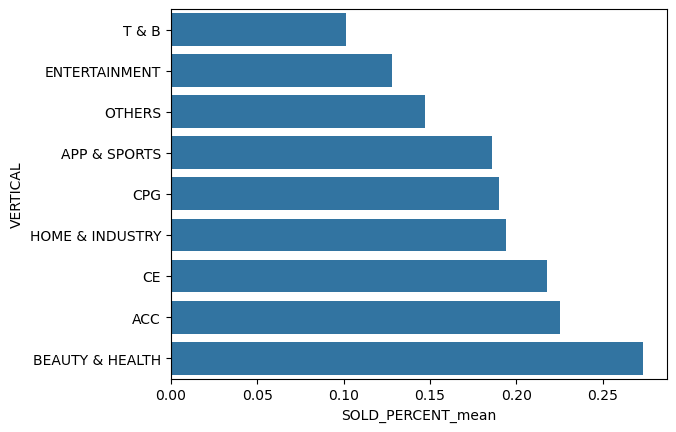

In [17]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 10].sort_values(by='SOLD_PERCENT_mean', ascending=True).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

Los productos de bebe y juegos son los que menos stock venden del ofertado

In [18]:
dom_df[dom_df.index.isin(['BABY', 'PHARMACEUTICS'])][['INVOLVED_STOCK_sum', 'REMAINING_STOCK_AFTER_END_sum', 'SOLD_QUANTITY_sum']]

,INVOLVED_STOCK_sum,REMAINING_STOCK_AFTER_END_sum,SOLD_QUANTITY_sum
DOM_DOMAIN_AGG1,,,
BABY,17843,17137,591.0
PHARMACEUTICS,701047,606054,147723.0


Vemos de todas formas que el stock ofertado por PHARMACEUTICS es muy superior al de BABY, posiblemente, porque es mas variado y tiene un publico mucho menos especifico.

In [19]:
dom_df[dom_df.index.isin(['PETS FOOD', 'SECURITY'])][['INVOLVED_STOCK_sum', 'REMAINING_STOCK_AFTER_END_sum', 'SOLD_QUANTITY_sum', 'ASP_mean']]

,INVOLVED_STOCK_sum,REMAINING_STOCK_AFTER_END_sum,SOLD_QUANTITY_sum,ASP_mean
DOM_DOMAIN_AGG1,,,,
PETS FOOD,4039,2474,1523.0,5.091416
SECURITY,8402,7251,1143.0,10.808264


Aun asi, sectores de Nicho como PETS FOODS y SECURITY performan bien, posiblemente porque la oferta era muy buena viendo los precios promedio (a falta de un ASP, no se puede afirmar de todas formas) 

# Efecto de free shipping

In [30]:
sh_df = df.groupby(['SHIPPING_PAYMENT_TYPE'])[['INVOLVED_STOCK', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
sh_df.columns = ['_'.join(col) for col in sh_df.columns.to_flat_index()]

In [39]:
sh_df[['SOLD_PERCENT_count', 'SOLD_PERCENT_mean', 'ASP_median', 'SOLD_QUANTITY_sum', 'SOLD_AMOUNT_sum', 'INVOLVED_STOCK_sum']]

,SOLD_PERCENT_count,SOLD_PERCENT_mean,ASP_median,SOLD_QUANTITY_sum,SOLD_AMOUNT_sum,INVOLVED_STOCK_sum
SHIPPING_PAYMENT_TYPE,,,,,,
free_shipping,26658,0.156757,7.897,66124.0,748536.12,592537
none,22088,0.259344,2.430,203566.0,510127.38,1113939


In [35]:
shp_df = df[df['DOM_DOMAIN_AGG1'] == 'PHARMACEUTICS'].groupby(['SHIPPING_PAYMENT_TYPE'])[['INVOLVED_STOCK', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
shp_df.columns = ['_'.join(col) for col in shp_df.columns.to_flat_index()]
shp_df[['SOLD_PERCENT_count', 'SOLD_PERCENT_mean', 'ASP_median']]

,SOLD_PERCENT_count,SOLD_PERCENT_mean,ASP_median
SHIPPING_PAYMENT_TYPE,,,
free_shipping,1183,0.303577,7.475333
none,1852,0.377373,2.261000


A pesar de ofertar cantidades similares en el cerrado, aquellas ofertas relampago sin envio gratis resultaron vender mas del stock ofertado que aquellas con envio gratis (y mas unidades en general). Podria deberse a una cuestion de precio, dada la diferencia en ASP, que podria justificar el pago del envio.

# Efecto del tiempo de oferta relampago

In [22]:
df[['OFFER_SPAN_MINUTES', 'SOLD_PERCENT']].corr()

,OFFER_SPAN_MINUTES,SOLD_PERCENT
OFFER_SPAN_MINUTES,1.000000,-0.141833
SOLD_PERCENT,-0.141833,1.000000


In [23]:
time_df = df.groupby(round(df['OFFER_SPAN_MINUTES'], -1))[['SOLD_PERCENT']].agg(['mean', 'median', 'count']).reset_index()
time_df.columns = ['_'.join(col) for col in time_df.columns.to_flat_index()]
time_df

,OFFER_SPAN_MINUTES_,SOLD_PERCENT_mean,SOLD_PERCENT_median,SOLD_PERCENT_count
0,0.0,0.000776,0.000000,3864
1,10.0,0.704318,1.000000,30
2,20.0,0.927083,1.000000,36
3,30.0,0.950768,1.000000,41
4,40.0,0.846776,1.000000,46
...,...,...,...,...
57,660.0,0.025000,0.025000,2
58,700.0,0.056667,0.056667,2
59,720.0,0.246822,0.133333,172
60,880.0,0.166667,0.100000,3


<Axes: xlabel='OFFER_SPAN_MINUTES_', ylabel='SOLD_PERCENT_count'>

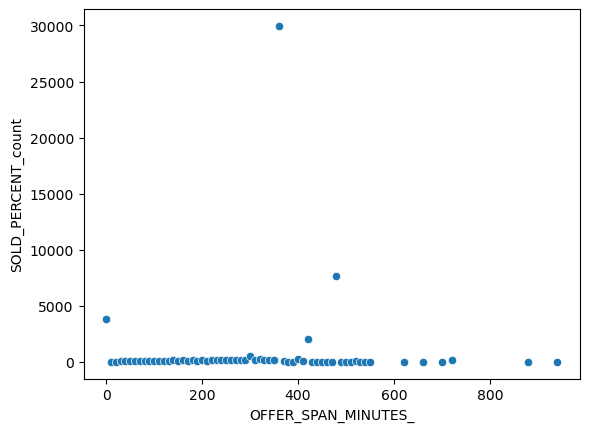

In [24]:
sns.scatterplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_count')

<Axes: xlabel='OFFER_SPAN_MINUTES_', ylabel='SOLD_PERCENT_mean'>

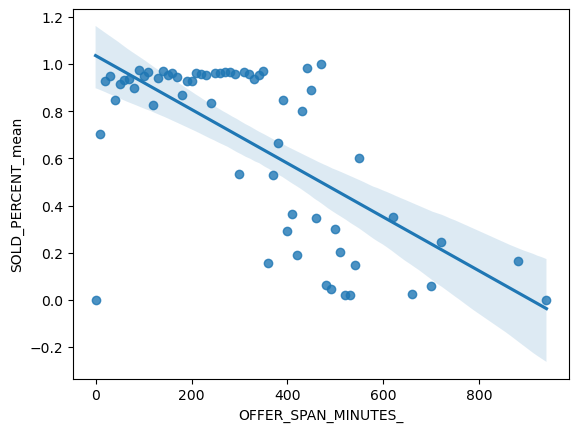

In [25]:
sns.regplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_mean')

<Axes: xlabel='OFFER_SPAN_MINUTES_', ylabel='SOLD_PERCENT_median'>

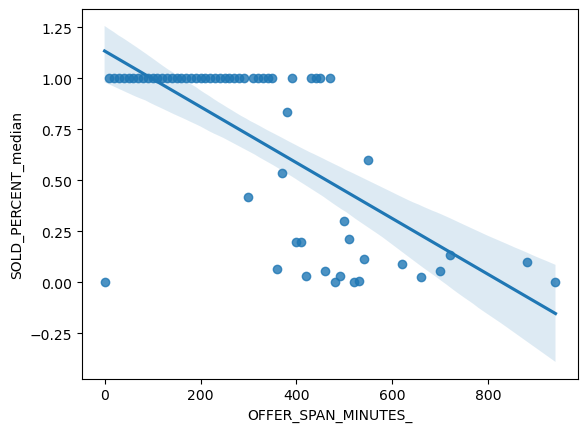

In [26]:
sns.regplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_median')

Aquellas ofertas de menor tiempo de disponibilidad aparentan ser mas exitosas en vender su stock.

In [27]:
dom_df = df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES']].agg(['sum', 'max', 'mean', 'median', 'count'])
dom_df.columns = ['_'.join(col) for col in dom_df.columns.to_flat_index()]

# Cuales sobrevendieron?

In [43]:
os_df = df[df['REMAINING_STOCK_AFTER_END'] < 0]
os_df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP,OFFER_SPAN,OFFER_SPAN_MINUTES,SOLD_PERCENT
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0.786667,0 days 07:02:43,423.0,1.0
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,9.366364,0 days 04:05:39,246.0,1.0
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 04:05:32,246.0,1.0
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS,1.353333,0 days 01:20:21,80.0,1.0
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,lightning_deal,8,-1,12.61,9.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,1.401111,0 days 02:42:19,162.0,1.0


In [45]:
# TODO: Cuanto sobrevendieron? Que categorias? 

# Cuales no vendieron?

In [46]:
ns_df = df[df['SOLD_QUANTITY'] == 0]
ns_df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP,OFFER_SPAN,OFFER_SPAN_MINUTES,SOLD_PERCENT
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,0.0,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,NaN,0 days 06:00:02,360.0,0.0
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,0.0,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 07:00:12,420.0,0.0
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 06:00:00,360.0,0.0
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,0.0,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS,NaN,0 days 06:00:04,360.0,0.0
15,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:00+00:00,lightning_deal,6,6,NaN,0.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,NaN,0 days 08:00:00,480.0,0.0


In [47]:
# TODO: Cuanto sobrevendieron? Que categorias? 

# Amounts vs cantidades